In [7]:
import sys
print('python', sys.version)

import os

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
print('seaborn', sns.__version__)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

python 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
numpy 1.19.1
pandas 1.1.1
matplotlib 3.3.1
seaborn 0.11.1


In [2]:
# mapping human gene symbol to entrez
dat=pd.read_table('data_ori/Sym2Entrez.txt',sep='\t')
dat.columns=['sym','entrez']
dat=dat.loc[dat['entrez'].notnull()]
dat=dat.loc[dat['sym'].notnull()]
dat['entrez']=dat['entrez'].astype(int).astype(str)

e2s=dat.set_index('entrez')
e2s_dic=e2s['sym'].to_dict() # e2s_dic={'1': 'A1BG', '503538': 'A1BG-AS1': ,...}

### read expression file

In [3]:
exp_ori=pd.read_table('data_ori/CCLE_expression.csv',index_col=0, sep=',') # CCLE_expression, 19144 genes, 1305 cells
print('# of nan: ', exp_ori.isnull().sum().sum()) # not containing nan value

exp_ori.columns=[gene.split(' ')[1] for gene in exp_ori.columns]
exp_ori.columns=[col[1:-1] for col in exp_ori.columns]
exp_ori.columns=[e2s_dic[col] if col in e2s_dic.keys() else 'NA_symbol' for col in exp_ori.columns]
exp_ori=exp_ori.loc[:,exp_ori.columns!='NA_symbol']

exp_arr=np.array(exp_ori)
print('# of ori expresions: ', exp_arr.flatten().shape)

exp_nonzero=exp_arr[exp_arr!=0]
print('# of non-zero expresions: ', exp_nonzero.shape)

exp_ori.index.name='DepMap_ID'
exp_ori
exp_ori=exp_ori.applymap(lambda x: int(x==0))
exp_ori


# of nan:  0
# of ori expresions:  (24975090,)
# of non-zero expresions:  (20781966,)


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SCYGR3,SCYGR7,OR8S1,SCYGR6,OR4F29,EEF1AKMT4,TBCE,OOSP4A,ARHGAP11B,OOSP3
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-001097,0.000000,0.000000,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106,2.150560,...,0.0,0.0,0.000000,0.0,0.000000,2.980025,5.132988,0.000000,0.443607,0.000000
ACH-001636,0.000000,0.000000,6.198887,2.032101,3.755956,2.601697,0.000000,0.000000,3.415488,3.620586,...,0.0,0.0,0.000000,0.0,0.000000,4.322649,4.100978,0.000000,2.589763,0.298658
ACH-001804,4.934988,0.000000,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474,4.139961,...,0.0,0.0,0.000000,0.0,0.000000,2.283922,4.288359,0.000000,0.475085,0.000000
ACH-000534,0.839960,0.000000,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460,3.157044,...,0.0,0.0,0.000000,0.0,0.000000,1.333424,4.841470,0.000000,3.904966,0.000000
ACH-001498,1.744161,0.000000,6.846744,2.147307,3.666757,5.252098,0.014355,1.641546,4.100978,4.246408,...,0.0,0.0,0.000000,0.0,0.000000,2.827819,4.187451,0.000000,1.469886,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000261,4.447579,0.028569,6.748864,2.650765,4.607626,0.042644,0.687061,6.400367,4.274262,4.828835,...,0.0,0.0,0.097611,0.0,0.000000,2.615887,4.613532,0.000000,2.411426,0.042644
ACH-000031,4.714795,0.028569,6.745910,2.776104,3.621759,0.056584,3.095924,6.936049,4.976822,4.451541,...,0.0,0.0,0.263034,0.0,0.070389,4.476382,4.425594,0.422233,2.014355,0.084064
ACH-000682,5.976364,0.124328,5.983450,2.939227,2.918386,0.084064,6.849374,5.742545,5.492815,3.949535,...,0.0,0.0,0.111031,0.0,0.575312,2.871844,3.783457,0.000000,1.526069,0.000000


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SCYGR3,SCYGR7,OR8S1,SCYGR6,OR4F29,EEF1AKMT4,TBCE,OOSP4A,ARHGAP11B,OOSP3
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-001097,1,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,0,1
ACH-001636,1,1,0,0,0,0,1,1,0,0,...,1,1,1,1,1,0,0,1,0,0
ACH-001804,0,1,0,0,0,1,0,0,0,0,...,1,1,1,1,1,0,0,1,0,1
ACH-000534,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,0,1
ACH-001498,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000261,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,1,0,0
ACH-000031,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
ACH-000682,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,1


In [4]:
def draw_boxplot_and_present_max_min_val(dat, ax, ax2, enter=True):
    sns.violinplot(data=dat, ax=ax)
    sns.histplot(data=dat, kde=True, ax=ax2)

    dat=dat.sort_values()
    print(dat)

    min_zero_dat=dat.iloc[[0]]
    min_zero_cel=min_zero_dat.index[0]
    min_zero_val=min_zero_dat.values[0]

    max_zero_dat=dat.iloc[[-1]]
    max_zero_cel=max_zero_dat.index[0]
    max_zero_val=max_zero_dat.values[0]
    
    if enter==True:
        ax.annotate('{}\n({})'.format(min_zero_cel, min_zero_val), xy=(0, min_zero_val), xytext=(-0.6, min_zero_val), ha='right', va='center', arrowprops={'arrowstyle':'simple'}, fontsize=8)
        ax.annotate('{}\n({})'.format(max_zero_cel, max_zero_val), xy=(0, max_zero_val), xytext=(-0.6, max_zero_val-1), ha='right', va='center', arrowprops={'arrowstyle':'simple'}, fontsize=8)

    
    if enter==False:
        ax.annotate('{}({})'.format(min_zero_cel, min_zero_val), xy=(0, min_zero_val), xytext=(-0.6, min_zero_val), ha='right', va='center', arrowprops={'arrowstyle':'simple'}, fontsize=8)
        ax.annotate('{}({})'.format(max_zero_cel, max_zero_val), xy=(0, max_zero_val), xytext=(-0.6, max_zero_val), ha='right', va='center', arrowprops={'arrowstyle':'simple'}, fontsize=8)
        
        
    ax.set_xlim(-1.5,0.5)
    ax.set_xticks([])
    

DepMap_ID
ACH-000682     647
ACH-000261     913
ACH-000031    1563
ACH-000978    1837
ACH-000110    1845
              ... 
ACH-001498    5696
ACH-001143    6023
ACH-001636    6108
ACH-001450    6155
ACH-001097    6298
Length: 1305, dtype: int64


1637

MPRIP           0
ARL8B           0
EDEM1           0
ZSCAN26         0
ZNF146          0
             ... 
DEFB106B     1305
KRTAP23-1    1305
USP17L29     1305
USP17L25     1305
CT47A8       1305
Length: 19138, dtype: int64


Text(0.05, 0.85, '(a)')

Text(0.3, 0.85, '(b)')

Text(0.55, 0.85, '(c)')

Text(0.8, 0.85, '(d)')

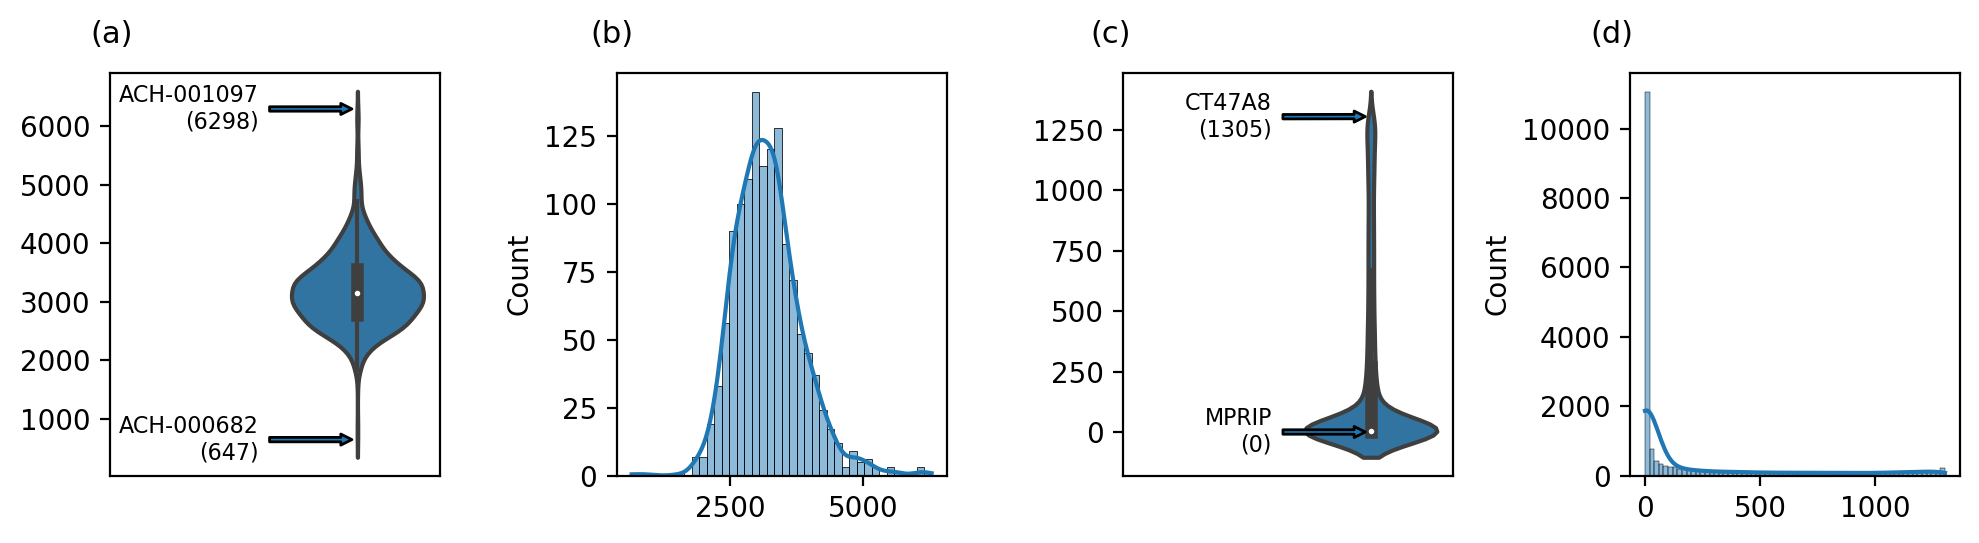

In [5]:
fig=plt.figure(figsize=(10,3), dpi=200)
axs= fig.subplots(1,4).flatten()

zero_dist_cells=exp_ori.sum(axis=1)
draw_boxplot_and_present_max_min_val(zero_dist_cells, axs[0], axs[1])
zero_dist_genes=exp_ori.sum(axis=0)
len(zero_dist_genes.loc[zero_dist_genes>=1000])
draw_boxplot_and_present_max_min_val(zero_dist_genes, axs[2], axs[3])

x=0.05
for num in ['(a)','(b)','(c)','(d)']:
    fig.text(x=x,y=0.85, s=num, fontsize=11)
    x+=0.25
    
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('dist_of_exp.png')

In [6]:
zero_dist_genes.sort_values().tail(20)

CT47A10      1305
USP17L27     1305
DEFB113      1305
CT47A3       1305
USP17L28     1305
CT47A11      1305
CT47A12      1305
USP17L30     1305
CT47A4       1305
CT47A5       1305
USP17L26     1305
CT47A9       1305
KRTAP20-3    1305
FAM236C      1305
F8A2         1305
DEFB106B     1305
KRTAP23-1    1305
USP17L29     1305
USP17L25     1305
CT47A8       1305
dtype: int64

### read mutation profile

In [7]:
mut_cnt=pd.read_table('data_preproc/mut_varL.txt',index_col=0, sep='\t')

mut_cnt.columns=[e2s_dic[col] if col in e2s_dic.keys() else 'NA_symbol' for col in mut_cnt.columns]
mut_cnt=mut_cnt.loc[:,mut_cnt.columns!='NA_symbol']

mut_cnt=mut_cnt.applymap(lambda x: int(x!=0))
mut_cnt

,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AAMP,AANAT,AARS1,ABAT,...,PTGES3L,DNAH17-AS1,FMC1-LUC7L2,PYURF,OVCH1-AS1,GOLGA8R,NPIPA8,ZNF891,SPECC1L-ADORA2A,MEI4
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
ACH-000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-002508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-002509,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DepMap_ID
ACH-001150      12
ACH-001092      13
ACH-001188      14
ACH-001230      18
ACH-001214      20
              ... 
ACH-000997    5675
ACH-000998    5714
ACH-000996    5859
ACH-000990    6368
ACH-000999    9698
Length: 1741, dtype: int64
RPL41       1
PHF5A       1
SFTPC       1
PRCD        1
LUZP6       1
         ... 
LRP1B     455
OBSCN     490
MUC16     771
TP53     1085
TTN      1109
Length: 18725, dtype: int64


Text(0.05, 0.85, '(a)')

Text(0.3, 0.85, '(b)')

Text(0.55, 0.85, '(c)')

Text(0.8, 0.85, '(d)')

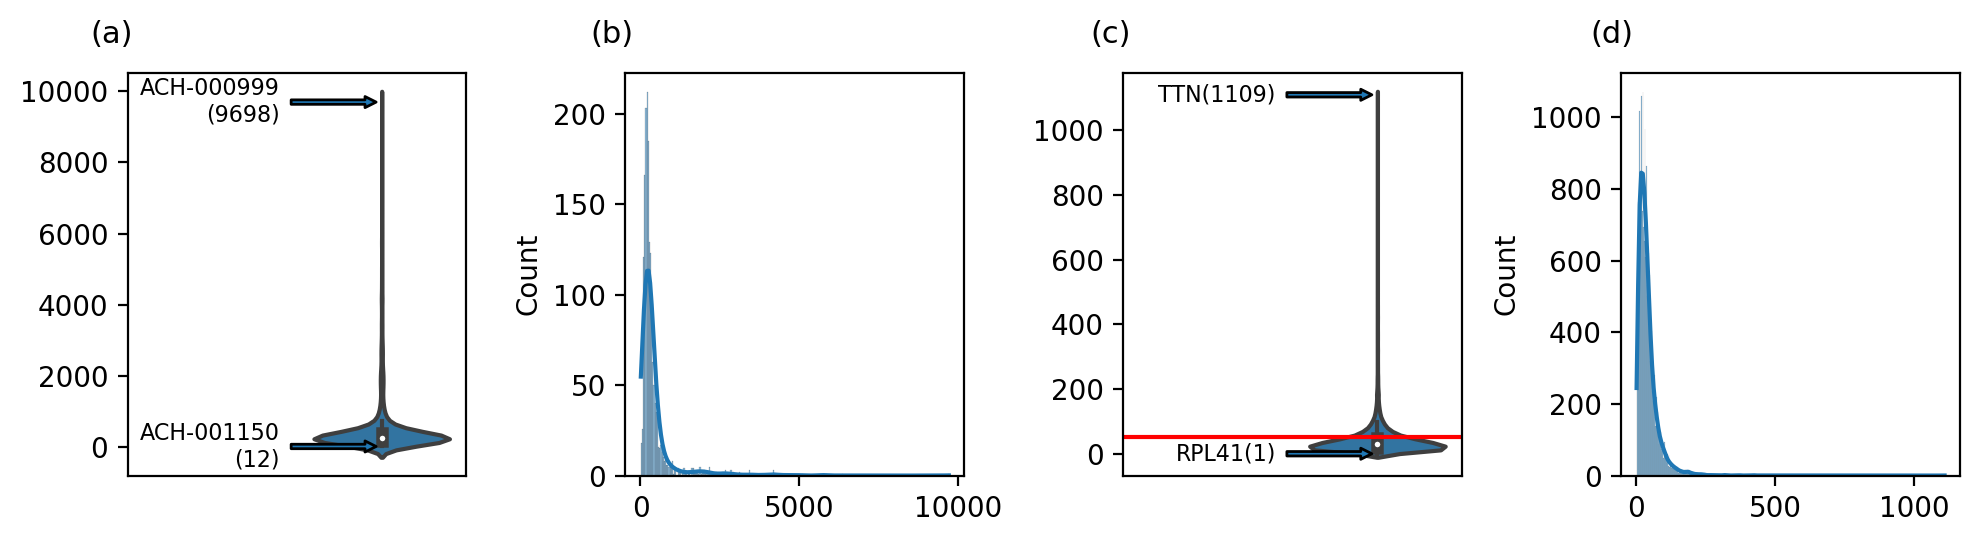

In [17]:
fig=plt.figure(figsize=(10,3), dpi=200)
axs= fig.subplots(1,4).flatten()

deleterious_mut_dist_cells=mut_cnt.sum(axis=1)
draw_boxplot_and_present_max_min_val(deleterious_mut_dist_cells, axs[0], axs[1])
deleterious_mut_dist_genes=mut_cnt.sum(axis=0)
draw_boxplot_and_present_max_min_val(deleterious_mut_dist_genes, axs[2], axs[3],enter=False)

x=0.05
for num in ['(a)','(b)','(c)','(d)']:
    fig.text(x=x,y=0.85, s=num, fontsize=11)
    x+=0.25
    
fig.tight_layout()
fig.subplots_adjust(top=0.8)
axs[2].axhline(y=52,color='r')
fig.savefig('dist_of_deterious_mut.png')

### read depletion profile (crispr)

In [31]:
dep_crp=pd.read_table('data_preproc/dep_crisper.txt',index_col=0, sep='\t')

dep_crp.columns=[col[1:-1] for col in dep_crp.columns]
dep_crp.columns=[e2s_dic[col] if col in e2s_dic.keys() else 'NA_symbol' for col in dep_crp.columns]
dep_crp=dep_crp.loc[:,dep_crp.columns!='NA_symbol']

dep_crp
dep_crp.values.flatten().min()
dep_crp.values.flatten().max()
# m1=np.mean(dep_crp.values.flatten())
# m1
dep_crp=dep_crp.applymap(lambda x: int(x<0))

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZSWIM8,ZUP1,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000004,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.174114,-0.161678,-0.160386,-0.122795,-0.464567,0.258084,0.237593,-0.408563,0.291832,0.218575
ACH-000005,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.273881,-0.231005,-0.497114,-0.195061,-0.408063,0.229242,-0.075883,-0.104001,0.075901,0.036985
ACH-000007,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.131611,-0.106505,-0.580785,-0.093252,-0.276874,0.211699,-0.012654,-0.351716,0.089140,-0.392549
ACH-000009,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.201588,0.093851,-0.437097,-0.280677,-0.230111,0.083021,0.022771,-0.596777,0.197627,-0.106398
ACH-000011,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.099465,0.074328,-0.697993,-0.410500,-0.507467,0.284407,0.158124,-0.240429,0.124847,-0.250949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002004,0.194973,0.151985,-0.086708,0.634931,-0.069435,-0.108299,-0.236366,-0.283538,-0.163834,0.200767,...,-0.278135,-0.255279,-0.559807,-0.329865,-0.575501,0.200474,0.086894,-0.331683,0.001423,-0.131932
ACH-002005,0.290347,0.049675,0.144091,0.053823,-0.407675,-0.117946,0.227736,-0.331013,-0.077048,0.135808,...,-0.049274,0.115309,-0.496360,-0.115057,-0.713280,0.304166,-0.080248,-0.123900,0.201571,-0.065916
ACH-002015,0.092499,-0.008914,-0.186905,0.226934,-0.004721,0.023954,0.168358,-0.456707,0.120760,0.026422,...,0.045786,-0.013114,-0.885187,-0.367360,-0.396577,0.039352,0.139145,-0.226734,0.047219,-0.163631


-4.011709657646018

6.369581000080571

DepMap_ID
ACH-000459     8512
ACH-000317     9076
ACH-000855     9127
ACH-000336     9143
ACH-001786     9157
              ...  
ACH-000393    10546
ACH-000735    10572
ACH-000264    10576
ACH-000608    10590
ACH-001517    10647
Length: 769, dtype: int64
IGFL1        0
EQTN         0
ZNF611       0
POTEE        0
MAPK9        1
          ... 
COPA       769
USP36      769
PES1       769
METTL16    769
U2SURP     769
Length: 16174, dtype: int64


Text(0.05, 0.85, '(a)')

Text(0.3, 0.85, '(b)')

Text(0.55, 0.85, '(c)')

Text(0.8, 0.85, '(d)')

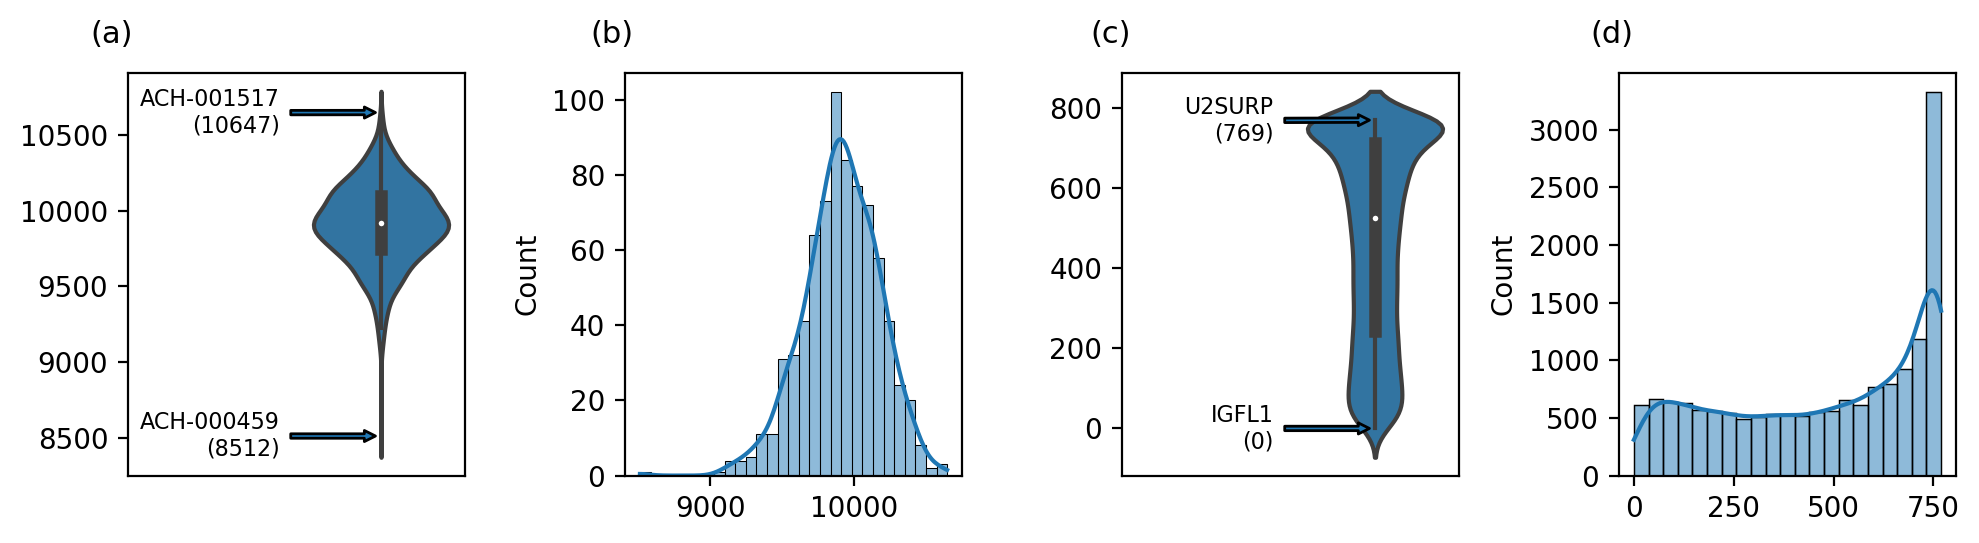

In [32]:
fig=plt.figure(figsize=(10,3), dpi=200)
axs= fig.subplots(1,4).flatten()

depletion_dist_cells=dep_crp.sum(axis=1)
draw_boxplot_and_present_max_min_val(depletion_dist_cells, axs[0], axs[1])
depletion_dist_genes=dep_crp.sum(axis=0)
draw_boxplot_and_present_max_min_val(depletion_dist_genes, axs[2], axs[3])

x=0.05
for num in ['(a)','(b)','(c)','(d)']:
    fig.text(x=x,y=0.85, s=num, fontsize=11)
    x+=0.25
    
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('dist_of_depleted_crispr.png')

### read depletion profile (shrna)

In [35]:
dep_shr=pd.read_table('data_preproc/dep_shRNA.txt',index_col=0, sep='\t')

dep_shr.columns=[col[1:-1] for col in dep_shr.columns]
dep_shr.columns=[e2s_dic[col] if col in e2s_dic.keys() else 'NA_symbol' for col in dep_shr.columns]
dep_shr=dep_shr.loc[:,dep_shr.columns!='NA_symbol']

dep_shr
dep_shr.values.flatten().min()
dep_shr.values.flatten().max()
np.sum(dep_shr.values.flatten()<0)
len(dep_shr.values.flatten())
dep_shr=dep_shr.applymap(lambda x: int(x<0))

,CDH2,AKT3,MED6,NR2E3,SIGLEC14,KCNE3,ZBTB33,CDH3,CDC42P3,HDAC6,...,NR1H4,CCS,NR1D2,CDC42,RCE1,HNRNPDL,DMTF1,PPP4R1,KCNE2,CASP8AP2
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-001270,-0.194962,-0.256108,-0.174220,-0.140052,0.077742,-0.235161,-0.012051,0.135390,0.197630,-0.042870,...,0.077694,0.224705,0.178494,-0.273734,-0.201644,-0.363670,0.184260,-0.115616,0.088853,-0.843295
ACH-001000,-0.028171,0.100751,-0.456124,-0.174618,-0.111691,-0.057127,-0.036372,0.019846,0.053259,0.022057,...,-0.120004,0.249664,-0.057862,-0.274488,0.074889,0.152158,0.036011,0.117300,-0.110628,-0.307031
ACH-001001,0.063047,-0.008077,-0.214376,-0.153619,-0.195624,0.143540,-0.003294,0.137083,-0.184220,0.000256,...,0.265685,-0.003567,0.064435,-0.065205,0.006735,-0.033385,0.197651,-0.016372,0.057286,-0.413669
ACH-002319,-0.237251,0.060267,-0.338946,-0.057551,-0.659711,0.012571,-0.091389,0.129589,-0.012625,0.252361,...,-0.132103,-0.264411,0.036777,0.156517,0.209009,-0.156839,-0.155837,-0.001141,0.028095,-1.849696
ACH-001827,-0.017059,-0.094749,-0.328074,-0.089573,-0.284499,0.071039,-0.118892,0.248833,0.100555,0.331037,...,-0.210424,0.242201,0.276576,-0.179985,-0.137465,-1.037848,-0.261262,-0.228016,0.159467,-0.414154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000570,0.000769,-0.072564,-0.175593,-0.155250,-0.209695,-0.045850,-0.248584,0.269947,-0.153742,-0.022693,...,0.133083,0.121545,0.102761,-0.209405,-0.079333,-0.358065,-0.090982,0.168945,0.109206,-0.046700
ACH-001249,-0.139126,0.017161,-0.226356,-0.445319,-0.046061,0.290969,-0.133735,-0.079662,0.167594,-0.095345,...,0.089457,0.231828,0.525148,0.127328,-0.050825,0.286697,0.134608,-0.166845,-0.048763,-0.865486
ACH-000097,0.047022,0.123615,-0.311682,-0.211145,-0.257977,-0.125789,-0.201745,0.182527,0.026933,0.112581,...,0.287817,0.121386,0.015063,-0.539853,-0.143304,-0.078062,-0.022528,0.021830,0.128882,-1.039110


-5.93237872763

2.7749557684500004

2525601

4082130

DepMap_ID
ACH-000645    2984
ACH-000258    2991
ACH-000828    3040
ACH-000524    3058
ACH-000054    3060
              ... 
ACH-000846    4092
ACH-000832    4117
ACH-000291    4126
ACH-000824    4172
ACH-000206    4188
Length: 702, dtype: int64
RGPD8             2
SENP3-EIF4A1      9
BGLAP            15
TPTE2P3          20
PKD1P1           33
               ... 
NIFK            702
CHAF1B          702
DDX18           702
PNN             702
PSMC1           702
Length: 5815, dtype: int64


Text(0.05, 0.85, '(a)')

Text(0.3, 0.85, '(b)')

Text(0.55, 0.85, '(c)')

Text(0.8, 0.85, '(d)')

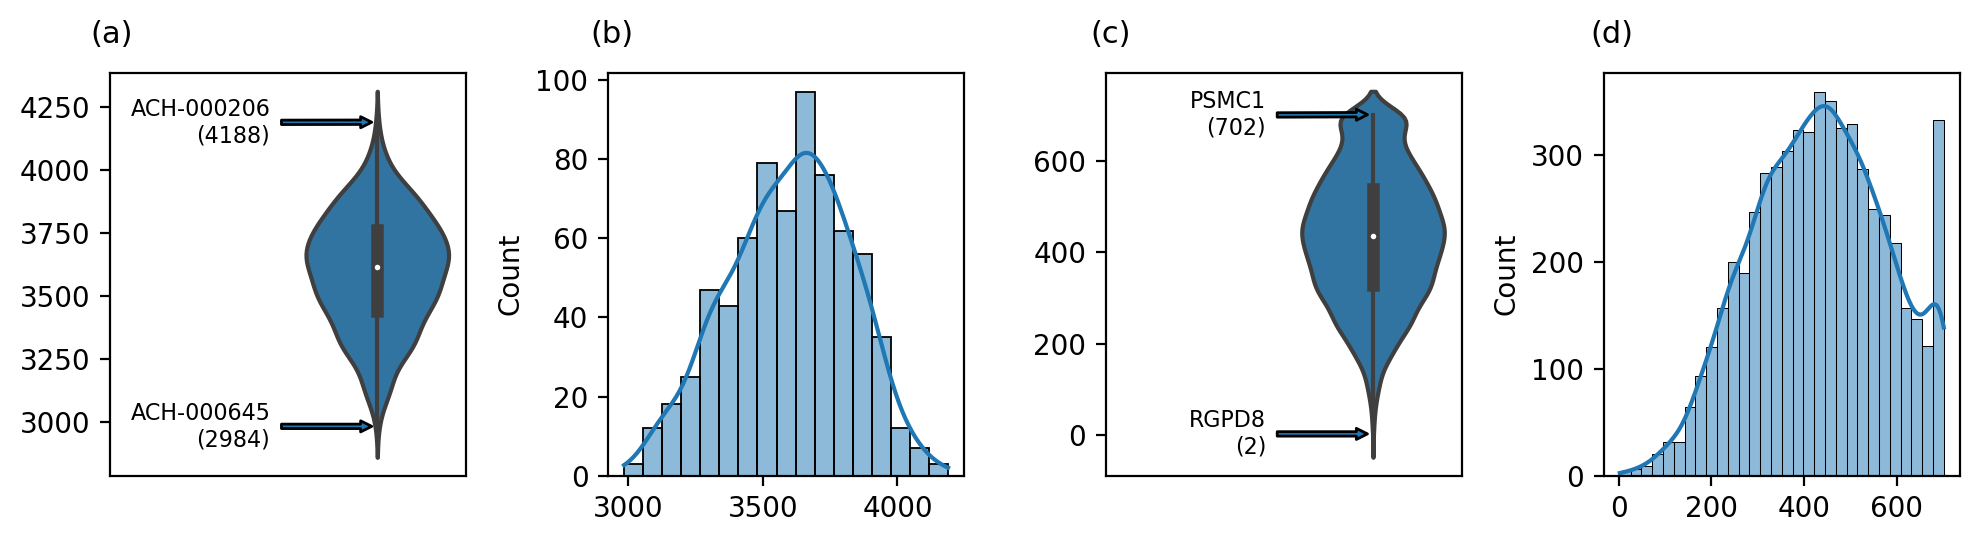

In [36]:
fig=plt.figure(figsize=(10,3), dpi=200)
axs= fig.subplots(1,4).flatten()

depletion_dist_cells=dep_shr.sum(axis=1)
draw_boxplot_and_present_max_min_val(depletion_dist_cells, axs[0], axs[1])
depletion_dist_genes=dep_shr.sum(axis=0)
draw_boxplot_and_present_max_min_val(depletion_dist_genes, axs[2], axs[3])

x=0.05
for num in ['(a)','(b)','(c)','(d)']:
    fig.text(x=x,y=0.85, s=num, fontsize=11)
    x+=0.25
    
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('dist_of_depleted_shrna.png')

In [18]:
import glob
[f1.split('\\')[-1].replace('.xml','') for f1 in glob.glob("./data_ori/KEGG/selected_pathway_all/*.xml")]

['hsa04010(MAPK)',
 'hsa04012(ErbB)',
 'hsa04014(Ras)',
 'hsa04015(Rap1)',
 'hsa04020(Calcium)',
 'hsa04022(cGMP_PKG)',
 'hsa04024(cAMP)',
 'hsa04064(NFKB)',
 'hsa04066(HIF1)',
 'hsa04068(FOXO)',
 'hsa04071(Sphingol)',
 'hsa04072(Phospho_D)',
 'hsa04110(Cell_cycle)',
 'hsa04115(p53)',
 'hsa04150(mTOR)',
 'hsa04151(PI3K_AKT)',
 'hsa04152(AMPK)',
 'hsa04210(Apoptosis)',
 'hsa04216(Ferroptosis)',
 'hsa04217(Necroptosis)',
 'hsa04310(Wnt)',
 'hsa04330(Notch)',
 'hsa04340(Hedgehog)',
 'hsa04350(TGF_beta)',
 'hsa04370(VEGF)',
 'hsa04371(Apelin)',
 'hsa04390(Hippo)',
 'hsa04630(JAK_STAT)',
 'hsa04668(TNF)',
 'hsa05200(pathways_in_cancer)',
 'hsa05210(colorectal)',
 'hsa05211(RCC)',
 'hsa05212(pancreatic)',
 'hsa05213(Endometrial)',
 'hsa05214(Glioma)',
 'hsa05215(Prostate)',
 'hsa05216(Thyroid)',
 'hsa05217(BCC)',
 'hsa05218(Melanoma)',
 'hsa05219(Bladder)',
 'hsa05220(CML)',
 'hsa05221(AML)',
 'hsa05222(SCLC)',
 'hsa05223(NSCLC)',
 'hsa05224(Breast)',
 'hsa05225(hepato)',
 'hsa05226(Gastric)